# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama:Amelia Gizzela Sheehan Auni
- Email: gizelaseehan@gmail.com
- User Dicoding: amelia_gizzela_2711

## Objective
Analyze factors contributing to high attrition rates (>10%) and create a business dashboard to monitor these factors.

## 1. Persiapan
Menyiapkan Library yang dibutuhkan

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

## 1. Data Understanding

In [14]:
# Load the dataset (assuming CSV format)
df = pd.read_csv(r'data/employee_data.csv')  # Adjust path as needed

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (1470, 35)

First 5 Rows:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvo

## 2. Exploratory Data Analysis (EDA) 

Current Attrition Rate: 16.92%


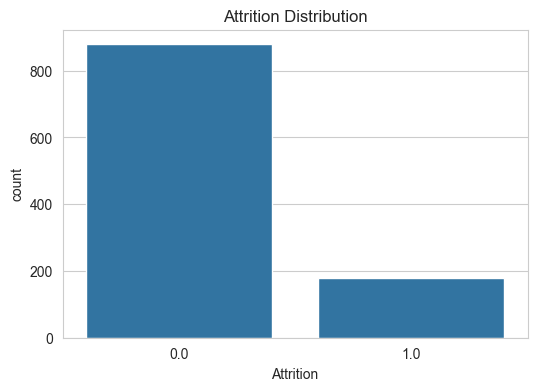

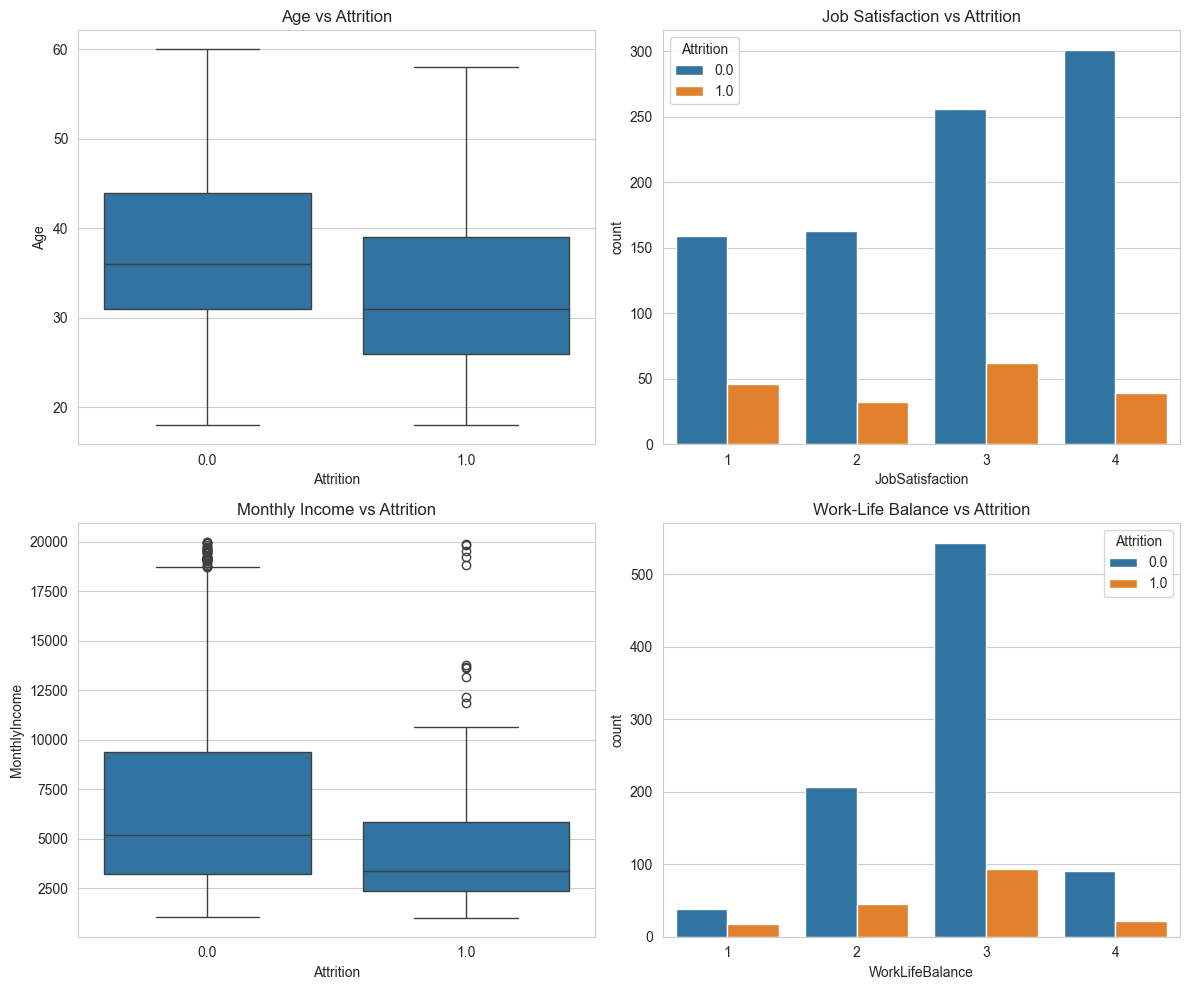

In [12]:
# Calculate attrition rate
attrition_rate = df['Attrition'].mean() * 100
print(f"Current Attrition Rate: {attrition_rate:.2f}%")

# Distribution of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

# Analyze key factors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Attrition')

# Job Satisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Job Satisfaction vs Attrition')

# Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Income vs Attrition')

# Work-Life Balance vs Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Work-Life Balance vs Attrition')

plt.tight_layout()
plt.show()

## 3. Feature Importance Analysis **(Modelling)**

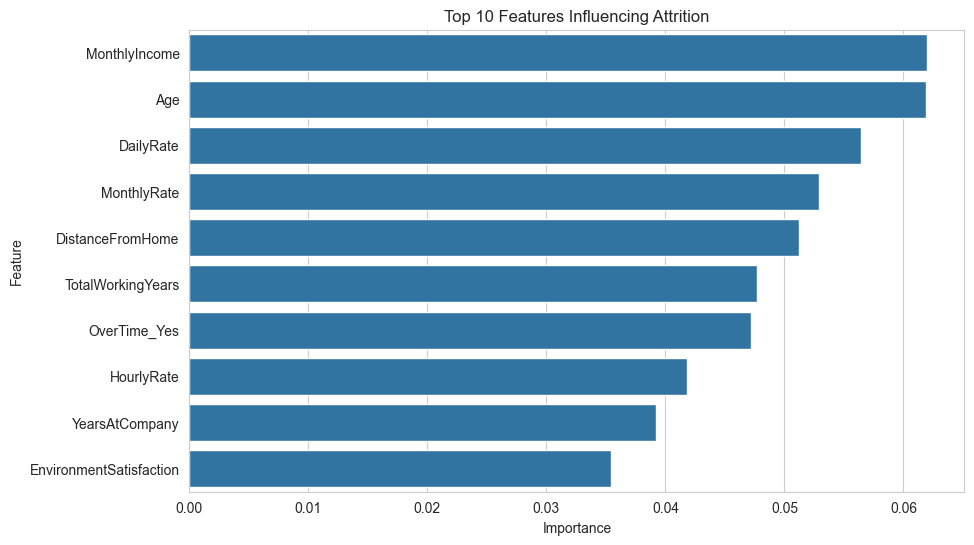


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       173
         1.0       1.00      0.15      0.27        39

    accuracy                           0.84       212
   macro avg       0.92      0.58      0.59       212
weighted avg       0.87      0.84      0.79       212



In [13]:
# Prepare data for modeling
# Convert categorical variables to numeric
df_model = df.copy()

# Drop rows where the target variable 'Attrition' is NaN
df_model.dropna(subset=['Attrition'], inplace=True)

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_model.drop(['EmployeeId', 'Attrition'], axis=1)
y = df_model['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing Attrition')
plt.show()

# Model performance
y_pred = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the full feature importance data to a new CSV file
feature_importance.to_csv('feature_importance_data.csv', index=False)

Berdasarkan analisis:
1. **Tingkatkan Kepuasan Kerja**: Karyawan dengan kepuasan kerja yang rendah memiliki tingkat pergantian karyawan yang lebih tinggi. Terapkan program keterlibatan dan sesi umpan balik rutin.
2. **Tingkatkan Kompensasi**: Pendapatan bulanan yang lebih rendah dikaitkan dengan pergantian karyawan. Tinjau struktur gaji, terutama untuk peran tingkat pemula.
3. **Keseimbangan Kerja-Hidup**: Keseimbangan kerja-hidup yang buruk berkorelasi dengan pergantian karyawan. Pertimbangkan jam kerja yang fleksibel atau opsi kerja jarak jauh.
4. **Pantau Indikator Utama**: Gunakan dasbor untuk melacak kepuasan kerja, pendapatan, dan keseimbangan kerja-hidup secara teratur.

## Langkah Berikutnya
- Lakukan survei karyawan untuk memvalidasi temuan.
- Terapkan strategi retensi yang ditargetkan dan pantau dampaknya menggunakan dasbor.
- Jelajahi model prediktif tingkat lanjut untuk memperkirakan risiko pergantian karyawan individu.

In [ ]:
 pip freeze > requirements.txt